In [52]:
def get_avg(sr):
    rewards = sr.tolist()
    avg_reward = [0.] * len(rewards)
    cumulative_rewards = [0.] * len(rewards)
    cumulated_r = 0.
    for i in range(len(rewards)):
        cumulated_r += rewards[i]
        cumulative_rewards[i] = cumulated_r

    for i in range(len(rewards)):
        if i == 0:
            avg_reward[i] = rewards[i]
        else:
            avg_reward[i] = (cumulative_rewards[i] - cumulative_rewards[0])/i
    return avg_reward

In [59]:
%matplotlib inline
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27),'legend.fontsize': 18})

mountain = ['Data/Moun_DQN_Guided_Exploration.csv','Data/Moun_DQN.csv']
lunar = ['Data/Luna_DQN_Guided_Exploration','Data/Luna_DQN']

def get_merged_df(dir):
    df1 = pd.read_csv(dir[0]).iloc[:,1] # read column 1
    df1 = pd.Series(get_avg(df1)).rename('DQN_Guided_Exploration')
    # df1 = df1.rename('DQN_Guided_Exploration')
    df2 = pd.read_csv(dir[1]).iloc[:,1]  # read column 1
    df2 = pd.Series(get_avg(df2)).rename('DQN')
    # df1 = df1.rename('DQN')
    merged = pd.concat([df1,df2],axis=1)
    return merged

df = get_merged_df(mountain)
df

,DQN_Guided_Exploration,DQN
0,-200.000000,-200.000000
1,-200.000000,-200.000000
2,-200.000000,-200.000000
3,-200.000000,-200.000000
4,-200.000000,-200.000000
...,...,...
195,-192.512821,-192.035897
196,-192.551020,-192.061224
197,-192.446701,-191.786802
198,-192.353535,-191.530303


In [57]:
def get_avg(sr):
    rewards = sr.tolist()
    avg_reward = [0.] * len(rewards)
    cumulative_rewards = [0.] * len(rewards)
    cumulated_r = 0.
    for i in range(len(rewards)):
        cumulated_r += rewards[i]
        cumulative_rewards[i] = cumulated_r

    for i in range(len(rewards)):
        if i == 0:
            avg_reward[i] = rewards[i]
        else:
            avg_reward[i] = (cumulative_rewards[i] - cumulative_rewards[0])/i
    return avg_reward

Text(0, 0.5, 'Avg Rewards')

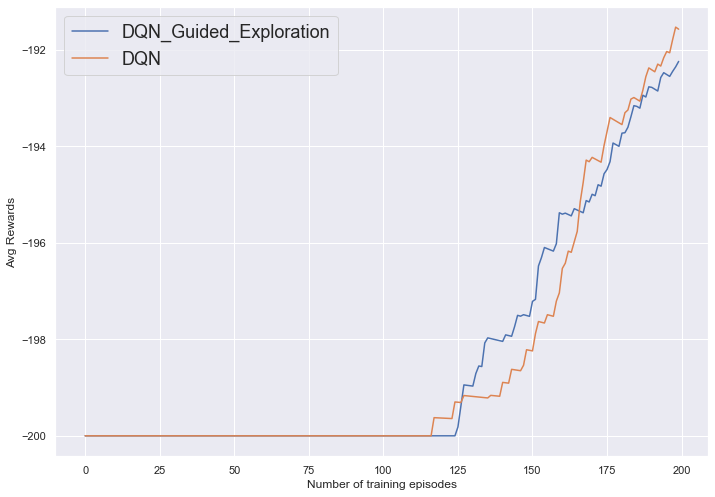

In [60]:
ax = sns.lineplot(data=df,color="red", dashes=False)
#ax.lines[0].set_linestyle("-")
#ax.lines[1].set_linestyle("-")
#ax.lines[2].set_linestyle("-")

ax.set_xlabel('Number of training episodes')
ax.set_ylabel('Avg Rewards')